Model: "LSTM-Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (InputLayer)    [(None, None, 20)]        0         
                                                                 
 LSTM-Layer (LSTM)           [(None, 60),              19440     
                              (None, 60),                        
                              (None, 60)]                        
                                                                 
 Final-Output-Dense (Dense)  (None, 2)                 122       
                                                                 
Total params: 19562 (76.41 KB)
Trainable params: 19562 (76.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
num params= 19440
(1000, 1, 20) (1000,)
Epoch 1/10
25/25 [==============================] - 2s 19ms/step - loss: 0.4752 - accuracy: 0.9475 - v

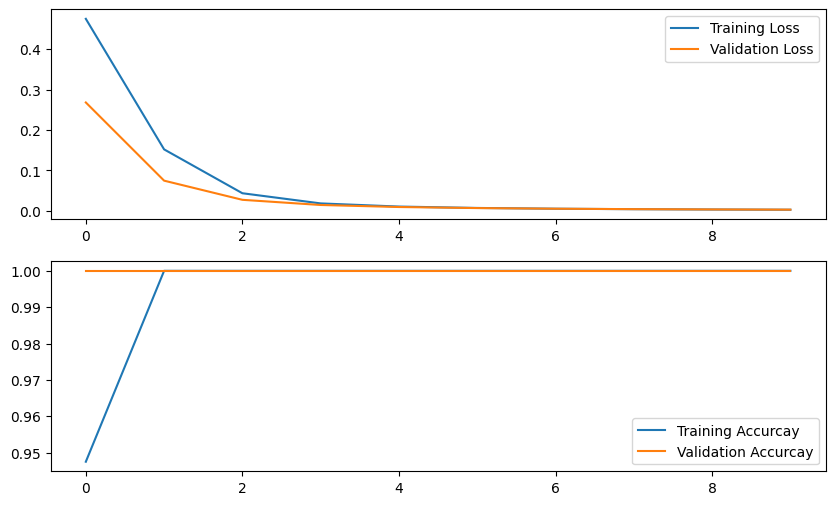

In [17]:
import numpy as np
from keras.models import Model
from keras.layers import Input,  LSTM, Dense  
from plot_utils import plot_history 

np.random.seed (seed=2020)

input_dim = 20 
latent_dim = 60
num_labels  = 2

inp  = Input (shape=(None, input_dim), name='Input-Layer')
lstm_out, h_state, c_state   = LSTM (latent_dim, return_state=True,name='LSTM-Layer') (inp)

final_out = Dense(num_labels, activation='softmax', name='Final-Output-Dense')(lstm_out)

model = Model (inp, final_out,name='LSTM-Classifier')
print(model.summary())

num_params = 4 * ( input_dim * latent_dim + latent_dim * latent_dim + latent_dim) 
print("num params=",num_params)

# craete some fake data 
X = np.random.random ([1000, 1, input_dim])
y = np.random.randint(0,1,[1000])
print(X.shape, y.shape)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X,y,epochs=10,validation_split=0.2)

plot_history(history)